<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Image_Style_Transfer_Using_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Style Transfer Using Convolutional Neural Networks**

논문 링크: https://rn-unison.github.io/articulos/style_transfer.pdf

content image와 style image 두 image를 이용해 content와 style를 분리하고 다시 재구성하는 작업인 style transfer는 어려운 작업이다. 하지만, CNN에 texture recognition, artistic style classification 등의 강점이 있으므로 style transfer 역시 좋은 성능을 보인다고 가정을 하여 실험을 진행했다. 따라서 본 논문에서는 image의 내용과 스타일을 분리하고 다시 재결합 할 수 있는 A Neural Algorithm of Artistic Style를 제안한다.

## **Content feature & Style feature**

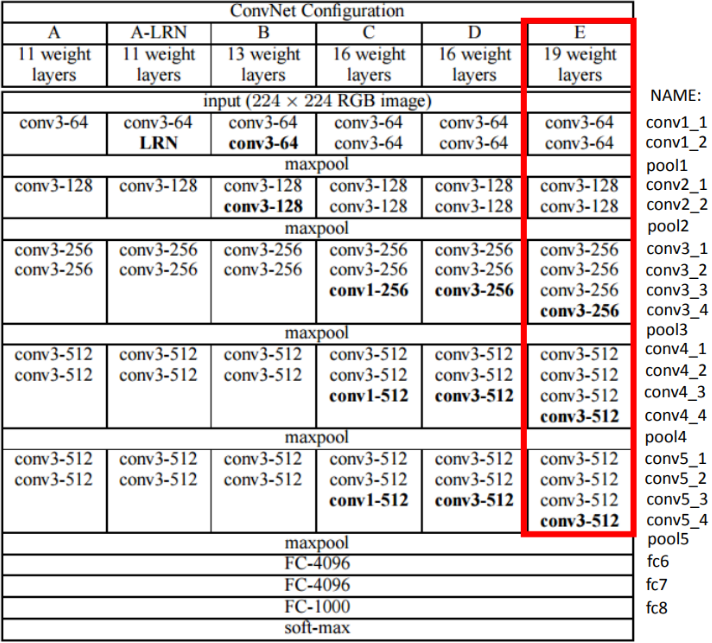

본 논문의 실험에서는 pretrained된 16개의 convolutional layer와 5개의 pooling layers를 가지고 있는 VGG-19를 사용했다.(위의 그림의 오른쪽 부분 참고)

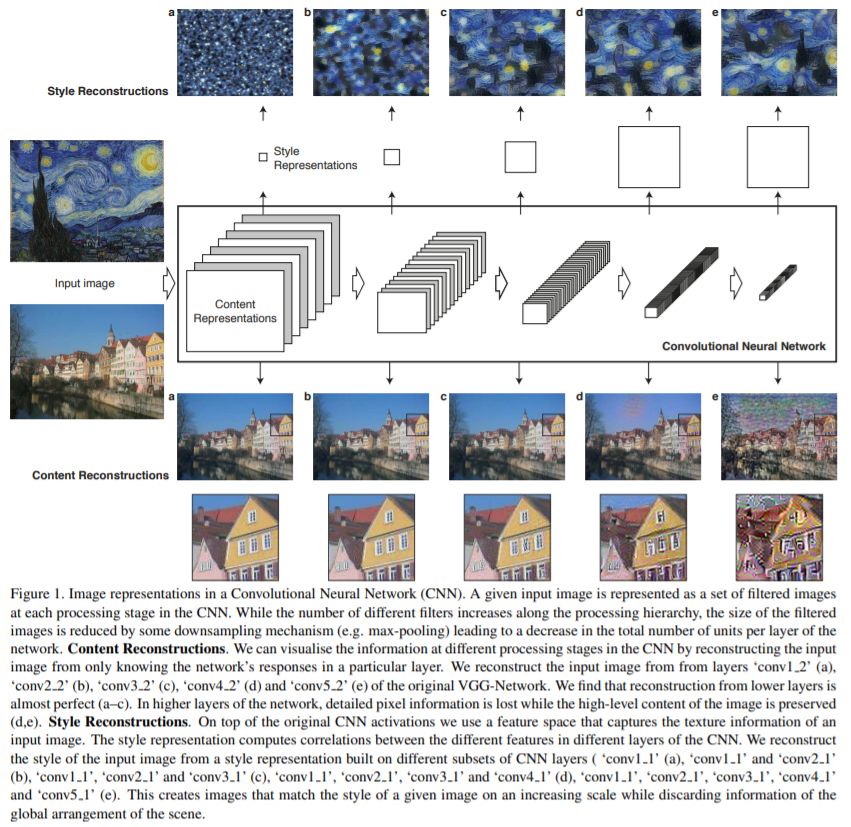

위의 그림 Figure 1은 conv1_2(a), conv2_2(b), conv3_2(c), conv4_2(d), conv5_2(e) layer에서 input image를 재구성한 image를 보여준다. 이를 통해 알 수 있는 사실은 layer가 깊어질수록 pixel 수준의 정보는 사라지지만 input image가 가진 semantic 정보는 그대로 유지가 되며(추상화가 많이 이루어진다.), 반대로 layer가 얕아질수록 input image와 거의 동일한 형태를 유지하는 것을 알 수 있다. 따라서 **본 논문에서는 얕은 layer에서 생성된 feature map을 활용해 content feature를 추출하며, 모든 layer에서 생성된 feature map을 활용해 style feature를 추출한다.**

### **Content loss**

먼저, content loss를 보겠다.

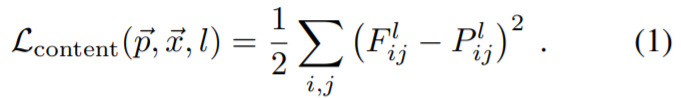

위의 식이 바로 content loss인데, 위에서 그림 Figure 1을 볼때 봤듯이 **high level layer 하나에서만** 이루어진다. 생성해야 하는 image x와 content image p를 학습시켜야 하는 이미지의 해당 layer에서 추출된 feature map(C x H x W)를 F_i, P_i라고 할때 계산되는 식이 바로 위의 식이다. 즉, 그냥 직관적으로 보면 **두개의 feature map의 차이를 제곱한 후에 모두 더해주는 L2 norm 방식이다.**

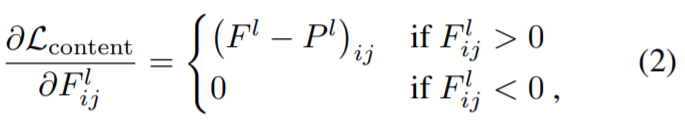

위의 식은 layer l loss function의 미분값이다.

### **Style loss**

style feature의 경우는 Texture Synthesis Using Convolutional Neural Networks(논문 링크: https://arxiv.org/abs/1505.07376 )에 나오는 Gram matrix를 기반으로 생성한다.

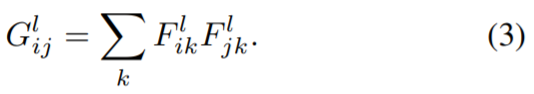

**style과 texture는 공간 정보와 무관**해야 한다. 즉, 이를 위해 위의 식과 같이 각 layer의 상관관계(correlation)를 Gram matrix를 정의한다.

style feature의 경우 위의 content feature와 다르게 단일 layer가 아닌 여러 layer에 나온 feature map들의 상관관계를 동시에 고려해야 한다. 이를 통해 이미지가 전역적으로 가진 레이아웃 정보가 아닌 정적인(stationary) 정보를 얻을 수 있다.

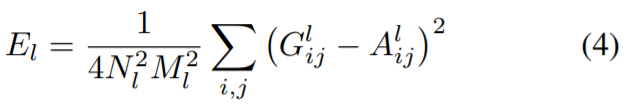

따라서 layer l에서의 style loss는 위의 식과 같이 정의가 되며,

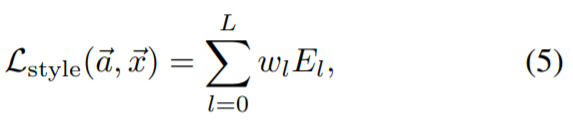

style feature는 앞서 언급했듯이 여러 layer를 동시에 사용하기 때문에 total style loss를 위의 식과 같이 정의한다.

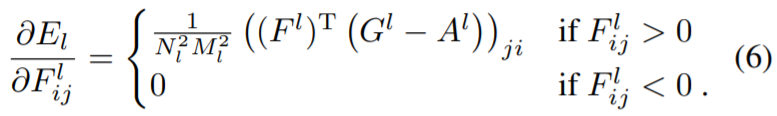

위의 식은 layer l loss function의 미분값이다.

### **Total loss**

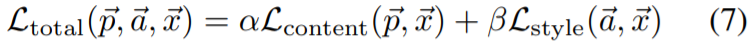

그리고 최종적으로 content loss와 style loss를 결합한 total loss는 위의 식과 같이 정의가 된다. 이때 α, β는 hyper parameter로써 content와 style 중 어느 것을 더 살릴지 결정할 수 있다.

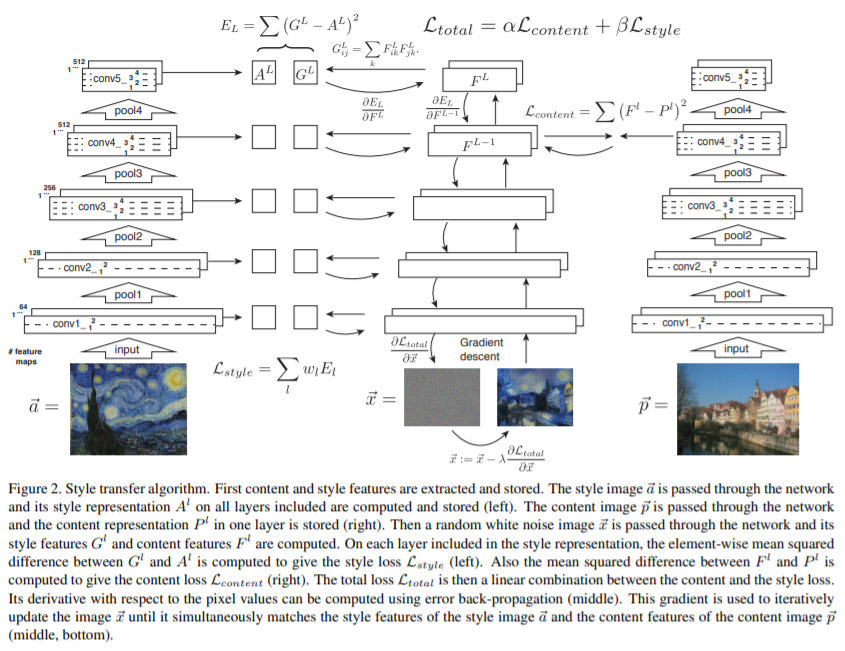

위의 그림 Figure 2를 보면 실제 style transfer algorithm을 알 수 있다. 설명을 하자면, content image p와 style image a에 대해 합성을 진행할 이미지인 x를 noise image로 초기화한다. 그리고 각 이미지 p, a, x를 ImageNet dataset에 pretrained VGG-19에 forward pass를 수행한다. p와 x에 대해 content loss를 계산하고 동시에 a와 x에 대해 style loss를 계산한다. **backpropagation 단계에서는 content loss와 style loss가 합쳐진 total loss를 통해 weight parameter는 업데이트하지 않으며, 생성하려는 input image x에 대해서만 x의 pixel 값들을 업데이트한다.**

## **Experiments**

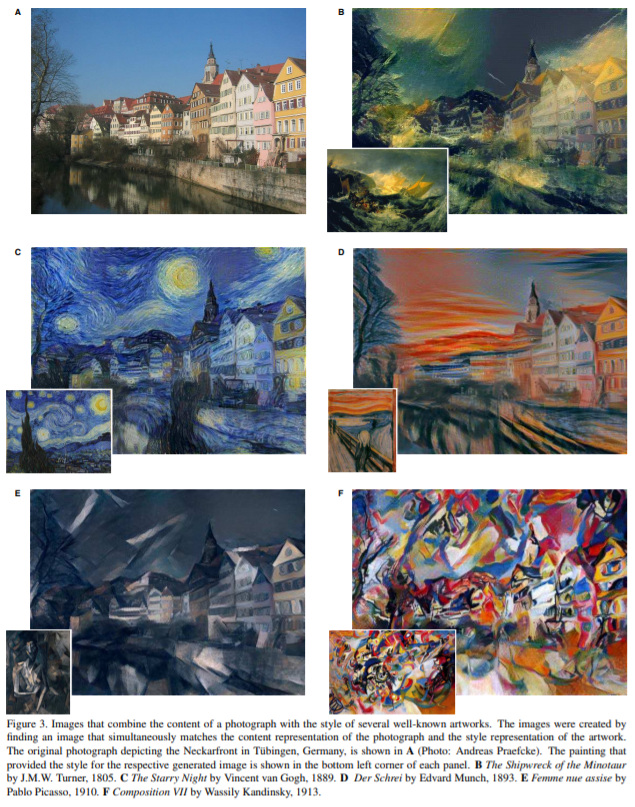

위의 그림 Figure 3의 B ~ F는 모두 다른 화가의 그림의 style을 원본 그림 A에 적용시킨 결과이다. 원본 그림의 이미지의 형태를 살리면서도 적용시킨 style에 맞게 매우 잘 변환한 것을 알 수 있다.

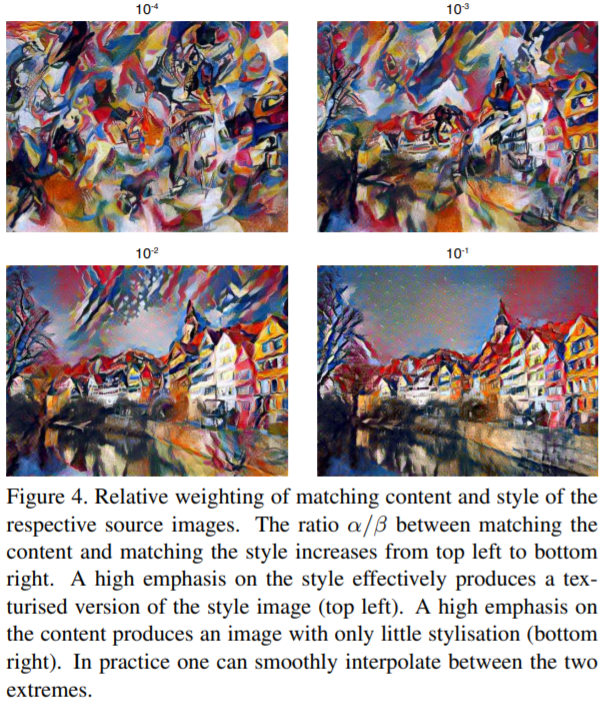

위의 그림 Figure 4는 α/β의 값이 10^-4 ~ 10^-1일때의 그림을 비교한 것이다. 이를 통해 style loss에 가중치를 크게 줄 경우(좌측 상단)에는 style에 중심적인 image x가 생성되며, 반대로 content loss에 가중치를 크게 줄 경우(우측 하단)에는 content 중심적인 image x가 생성된다.

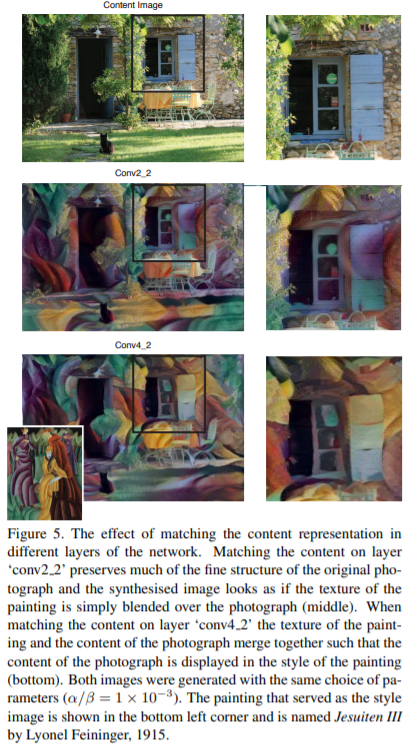

위의 그림 Figure 5는 content를 conv2_2와 conv4_2로 설정했을 때의 결과를 비교한 것이다. conv2_2 layer의 content를 사용시 원본 image의 미세한 구조가 대부분 보존되며 그림의 질감이  단순히 혼합 된 것처럼 보인다. 반면, conv4 2 layer의 content를 사용시 그림의 질감과 image의 내용이 합쳐져 미세한 구조가 변했다. (참고로, 두 경우 모두 hyper-parameter를 (α / β = 1 × 10−3)로 설정했다.)

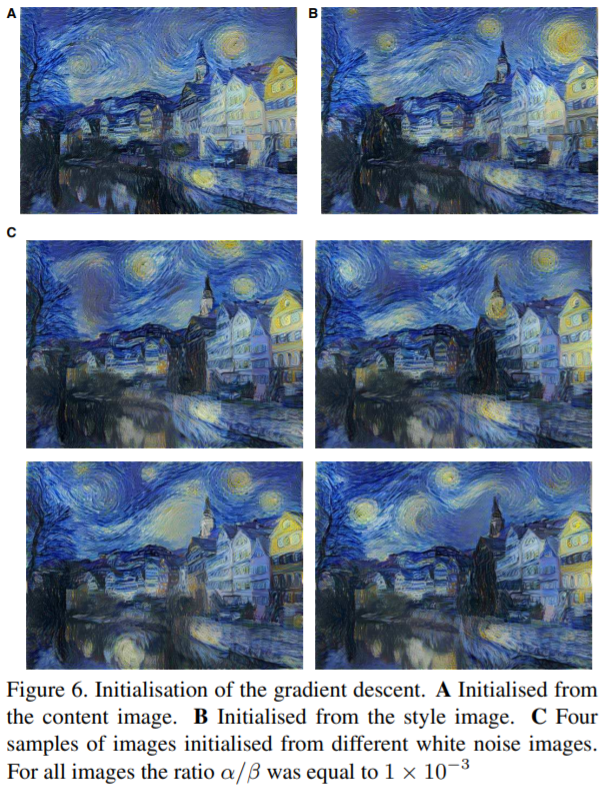

지금까지 모든 image를 white noise으로 초기화했다. 하지만 content image나 style image로 초기화되면 어떤 결과가 나올지 궁금하여 실험한 결과가 바로 위의 그림 Figure 6이다.

(A)는 content image의 경우이며 (B)는 style image의 경우다. 둘다 초기 이미지의 공간 구조쪽으로 다소 편향되는 경향이 있지만, 결과물을 보면 큰 영향을 끼치는 것으로 보이지는 않는다.


(C)의 경우는 기존과 같이 white noise image로 한 것이며, (A)나 (B)와 달리 random한 noise이기 때문에 (A)와 (B)는 항상 같은 결과물을 내뱉는거와 달리 계속 새로운 image를 생성할 수 있다.

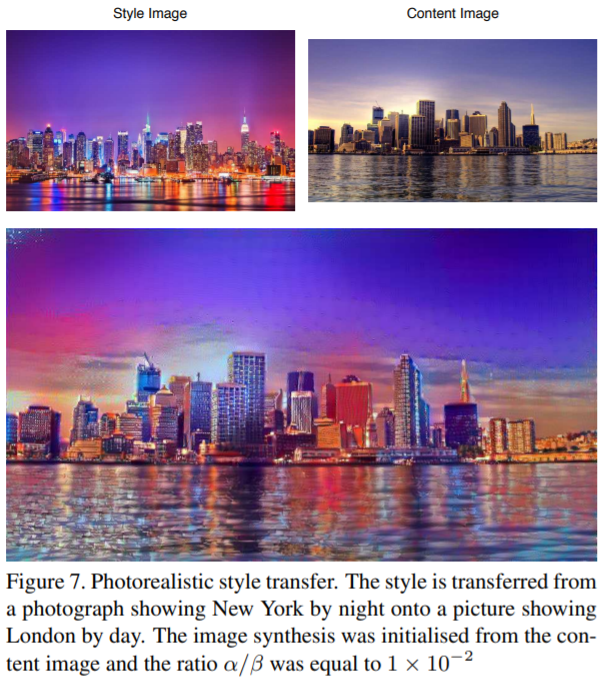

마지막으로 위의 그림 Figure 7은 낮에 찍은 New York image를 밤으로 style transfer한 결과물이다. 이때 input은 content image를 사용했으며 α/β의 값은 (1 × 10^−2)이다.